# Earthquake Severity Prediction


### Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

##### Reading Dataset

In [2]:
dataset=pd.read_csv("data/earthquake_data.csv")
dataset

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,NaN,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",NaN,NaN
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10-01-2001 16:02,5,7,NaN,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,NaN
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,09-01-2001 16:49,0,7,NaN,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",NaN,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,01-01-2001 08:54,0,5,NaN,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,"Mindanao, Philippines",NaN,NaN


# Data Preprocessing


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [4]:
# Checking for missing values in each column
missing_values = dataset.isnull().sum()
missing_values_percentage = (missing_values / len(dataset)) * 100

missing_data_info = pd.DataFrame({
    'Missing Values': missing_values, 
    'Percentage (%)': missing_values_percentage
})
missing_data_info.sort_values(by="Missing Values", ascending=False)


,Missing Values,Percentage (%)
continent,576,73.657289
alert,367,46.930946
country,298,38.107417
location,5,0.639386
dmin,0,0.000000
longitude,0,0.000000
latitude,0,0.000000
depth,0,0.000000
magType,0,0.000000
gap,0,0.000000


In [5]:
dataset["alert"] = dataset["alert"].fillna("red")
dataset.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert          0
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64

In [47]:
#### Fill alert missing values with red

In [6]:
dataset

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,red,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",NaN,NaN
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10-01-2001 16:02,5,7,red,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,NaN
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,09-01-2001 16:49,0,7,red,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",NaN,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,01-01-2001 08:54,0,5,red,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,"Mindanao, Philippines",NaN,NaN


In [7]:
dataset.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert          0
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64

## Check for Duplicates

In [8]:
# Check for duplicate rows
duplicates = dataset[dataset.duplicated()]

# Print the number of duplicates and the first few duplicate rows 
print("Number of duplicate rows:", duplicates.shape[0])
print(duplicates.head())


Number of duplicate rows: 0
Empty DataFrame
Columns: [title, magnitude, date_time, cdi, mmi, alert, tsunami, sig, net, nst, dmin, gap, magType, depth, latitude, longitude, location, continent, country]
Index: []


In [9]:
# There is no Duplicate Rows in the Dataset

# EDA

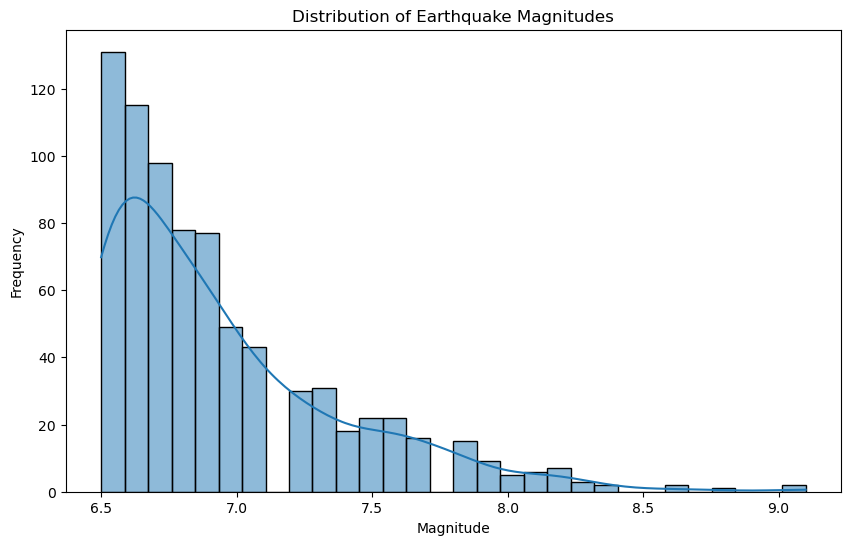

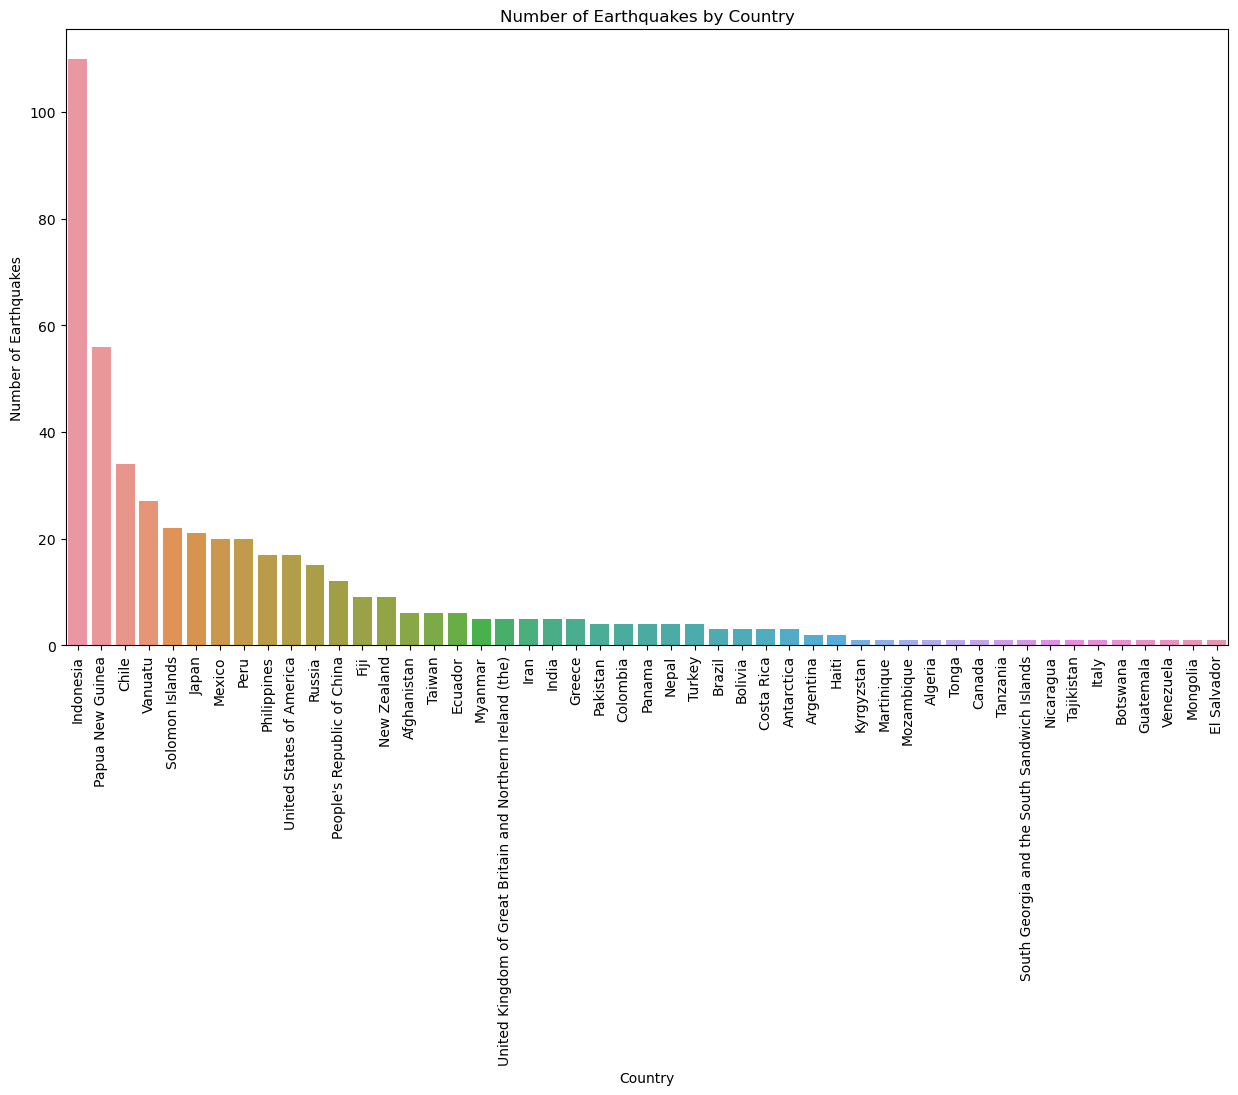

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Histogram of Magnitude
plt.figure(figsize=(10, 6))
sns.histplot(dataset['magnitude'], bins=30, kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(15, 8)) 
country_counts = dataset['country'].value_counts()

sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Number of Earthquakes by Country')
plt.xlabel('Country')
plt.ylabel('Number of Earthquakes')

# Rotate the x-axis labels to 90 degrees for better visibility
plt.xticks(rotation=90)  # Change to 90 degrees

plt.show()


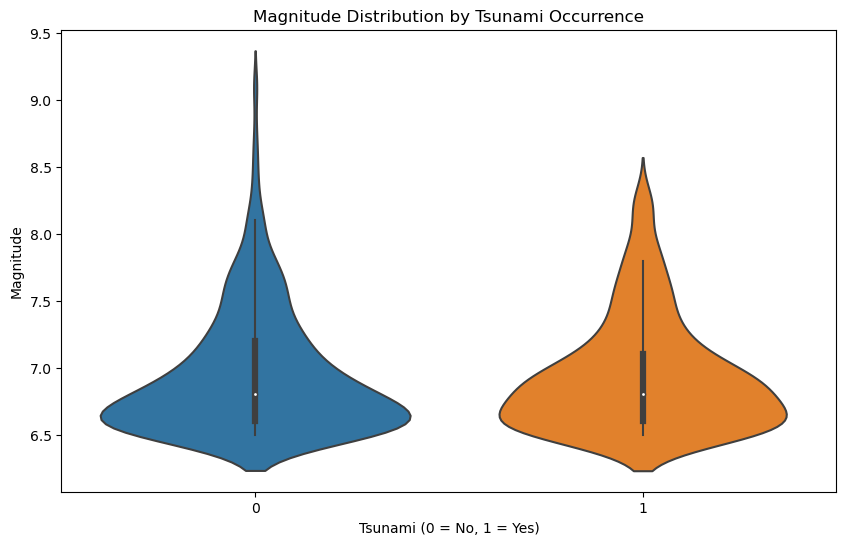

In [11]:

# Violin Plot for Earthquake Magnitude vs. Tsunami Occurrence
plt.figure(figsize=(10, 6))
sns.violinplot(data=dataset, x='tsunami', y='magnitude')
plt.title('Magnitude Distribution by Tsunami Occurrence')
plt.xlabel('Tsunami (0 = No, 1 = Yes)')
plt.ylabel('Magnitude')
plt.show()


# Correlation Matrix

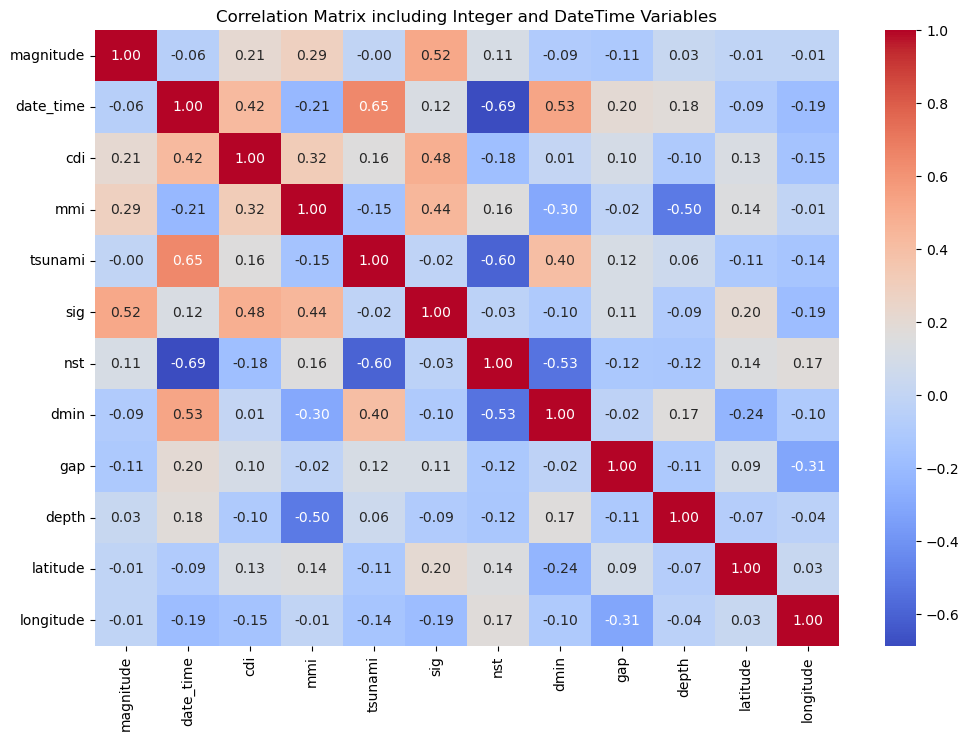

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert date_time to datetime format
dataset['date_time'] = pd.to_datetime(dataset['date_time'], errors='coerce')

# Select numeric and datetime columns
numeric_and_datetime_cols = dataset.select_dtypes(include=[np.number, 'datetime64']).columns

# Compute the correlation matrix including datetime converted to ordinal
corr_matrix = dataset[numeric_and_datetime_cols].apply(lambda x: x if np.issubdtype(x.dtype, np.number) else x.map(pd.Timestamp.toordinal)).corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix including Integer and DateTime Variables")
plt.show()


/var/folders/lb/s9f0rsxj6t9brcl13dgf2jt40000gn/T/ipykernel_7397/2472343486.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


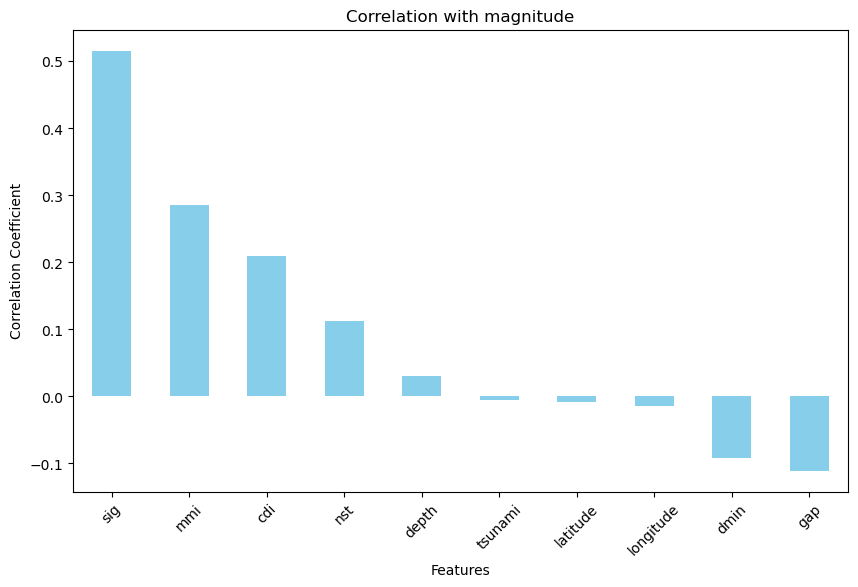

In [13]:
correlation_matrix = dataset.corr()
target_variable = 'magnitude' 
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)

# Remove the target variable from the series to avoid self-correlation
correlation_with_target = correlation_with_target.drop(target_variable)

# Plot the bar chart
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title(f'Correlation with {target_variable}')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


In [14]:
del dataset["date_time"]

In [48]:
#Deleting date_time because it has negative co-rrelation coefficient with magnitude 

In [15]:
dataset

,title,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,0,8,red,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",NaN,NaN
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,5,7,red,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,NaN
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,0,7,red,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",NaN,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,0,5,red,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,"Mindanao, Philippines",NaN,NaN


# Chi Square Test

In [16]:
from scipy.stats import chi2_contingency

# Convert 'magnitude' into a categorical variable for the chi-square test
# This can be done by binning the magnitude into ranges
magnitude_bins = pd.qcut(dataset['magnitude'], q=4, labels=False, duplicates='drop')

# Perform Chi-square tests for 'country', 'continent', 'location', 'magType', 'net', and 'alert'
categorical_columns = ['country', 'continent', 'location', 'magType', 'net', 'alert']
chi_square_results = {}

for col in categorical_columns:
    contingency_table = pd.crosstab(magnitude_bins, dataset[col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[col] = {'Chi-Square Statistic': chi2, 'p-value': p}

chi_square_results



{'country': {'Chi-Square Statistic': 153.02819649852083,
  'p-value': 0.287617262135679},
 'continent': {'Chi-Square Statistic': 20.24529103519705,
  'p-value': 0.16272360266318026},
 'location': {'Chi-Square Statistic': 1300.9504357367991,
  'p-value': 0.09723120430473117},
 'magType': {'Chi-Square Statistic': 39.987622249968055,
  'p-value': 0.021452360785815697},
 'net': {'Chi-Square Statistic': 50.294453186272605,
  'p-value': 0.011556099000382939},
 'alert': {'Chi-Square Statistic': 29.451833366086046,
  'p-value': 0.000543550092164323}}

In [17]:
del dataset["country"]

In [18]:
del dataset["continent"]

In [19]:
del dataset["location"]

In [20]:
del dataset["title"]

In [21]:
dataset

,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,7.0,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596
1,6.9,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738
2,7.0,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346
3,7.3,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129
4,6.6,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,red,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660
778,6.9,5,7,red,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281
779,7.1,0,7,red,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170
780,6.8,0,5,red,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899


In [22]:
#Deleting these three categorical coloumns as the P-values are less than 0.05

# label Encoding 

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
alert_le = LabelEncoder()
magtype_le = LabelEncoder()
net_le = LabelEncoder()
dataset["alert"]=alert_le.fit_transform(dataset["alert"])
dataset["magType"]=magtype_le.fit_transform(dataset["magType"])
dataset["net"]=net_le.fit_transform(dataset["net"])
dataset

,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,7.0,8,7,0,1,768,9,117,0.509,17.0,8,14.000,-9.7963,159.596
1,6.9,4,4,0,0,735,9,99,2.229,34.0,8,25.000,-4.9559,100.738
2,7.0,3,3,0,1,755,9,147,3.125,18.0,8,579.000,-20.0508,-178.346
3,7.3,5,5,0,1,833,9,149,1.865,21.0,8,37.000,-19.2918,-172.129
4,6.6,0,2,0,1,670,9,131,4.998,27.0,8,624.464,-25.5948,178.278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,2,0,912,9,427,0.000,0.0,7,60.000,13.0490,-88.660
778,6.9,5,7,2,0,745,0,0,0.000,0.0,5,36.400,56.7744,-153.281
779,7.1,0,7,2,0,776,9,372,0.000,0.0,6,103.000,-14.9280,167.170
780,6.8,0,5,2,0,711,9,64,0.000,0.0,7,33.000,6.6310,126.899


# MODEL BUILDING

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the data into features (X) and target (y)
X = dataset.drop(columns=['magnitude'])  # As 'magnitude' is the target variable
y = dataset['magnitude']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [25]:
y

0      7.0
1      6.9
2      7.0
3      7.3
4      6.6
      ... 
777    7.7
778    6.9
779    7.1
780    6.8
781    7.5
Name: magnitude, Length: 782, dtype: float64

In [26]:
X

,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,8,7,0,1,768,9,117,0.509,17.0,8,14.000,-9.7963,159.596
1,4,4,0,0,735,9,99,2.229,34.0,8,25.000,-4.9559,100.738
2,3,3,0,1,755,9,147,3.125,18.0,8,579.000,-20.0508,-178.346
3,5,5,0,1,833,9,149,1.865,21.0,8,37.000,-19.2918,-172.129
4,0,2,0,1,670,9,131,4.998,27.0,8,624.464,-25.5948,178.278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,0,8,2,0,912,9,427,0.000,0.0,7,60.000,13.0490,-88.660
778,5,7,2,0,745,0,0,0.000,0.0,5,36.400,56.7744,-153.281
779,0,7,2,0,776,9,372,0.000,0.0,6,103.000,-14.9280,167.170
780,0,5,2,0,711,9,64,0.000,0.0,7,33.000,6.6310,126.899


# Linear regression 

Loading the model and fitting it with training data

In [27]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#### Predict the testing data

In [28]:

from sklearn.metrics import r2_score, mean_squared_error

scores= {"Model name": ["Linear regression", "SVM", "Random Forest"], "mse": [], "R^2": []}

# Predict on the testing set
y_pred = regressor.predict(X_test)

# Compute R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

scores['mse'].append(mse)
scores['R^2'].append(r2)

print("R^2: {:.2f}, MSE: {:.2f}".format(r2, mse))

R^2: 0.17, MSE: 0.12


#### Predict for new data

In [29]:
# Predict on new data
new_data = [[8,7,0,1,768,9,117,0.509,17.0,8,14.000,-9.7963,159.596]]
new_pred = regressor.predict(new_data)
print("New predictions:", new_pred)

New predictions: [6.97777987]


/Users/rahulbangad/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Based on prediction giving Alert on Severity

In [30]:
if new_pred[0] > 5.0:
    print("The earthquake is predicted to be severe.")
else:
    print("The earthquake is predicted to be not severe.")

The earthquake is predicted to be severe.


In [31]:
# Second Model

# SVM

#### Loading the model and fitting it with training data


In [32]:
from sklearn.svm import SVR

# Select a subset of the training data
subset_size = 500
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Create an SVM model
svm = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Train the SVM model on the subset of data
svm.fit(X_train_subset, y_train_subset)

# Evaluate the model on the test set
score = svm.score(X_test, y_test)
print("Test score:", score)
     

Test score: -0.11483729238655549


#### Predict the testing data

In [33]:
# Predict on the testing set
y_pred_svm = svm.predict(X_test)

# Compute R^2 and MSE
r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

scores['mse'].append(mse_svm)
scores['R^2'].append(r2_svm)

print("SVM R^2: {:.2f}, MSE: {:.2f}".format(r2_svm, mse_svm))

SVM R^2: -0.11, MSE: 0.15


#### Predict for new data


In [34]:
# Predict on new data
new_pred_svm = svm.predict(new_data)
print("New SVM predictions:", new_pred_svm)

New SVM predictions: [6.98872299]


/Users/rahulbangad/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


#### Based on prediction giving Alert on Severity

In [35]:
if new_pred_svm[0] > 5.0:
    print("The earthquake is predicted to be severe.")
else:
    print("The earthquake is predicted to be not severe.")

The earthquake is predicted to be severe.


In [36]:
#Third model

# Random Forest 

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a random forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Predict the testing data

In [38]:
# Predict the target variable on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model using mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

scores['mse'].append(mse)
scores['R^2'].append(r2)

print('Mean Squared Error: ', mse)
print('R^2 Score: ', r2)

Mean Squared Error:  0.03693351719745237
R^2 Score:  0.7324789111372308


#### Predict for new data

In [39]:
# Predict on new data
new_pred_rf = rf.predict(new_data)
print("New RF predictions:", new_pred_rf)

New RF predictions: [6.993]


/Users/rahulbangad/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#### Based on prediction giving Alert on Severity

In [40]:
if new_pred_rf[0] > 5.0:
    print("The earthquake is predicted to be severe.")
else:
    print("The earthquake is predicted to be not severe.")

The earthquake is predicted to be severe.


In [41]:
column_name = dataset.columns.tolist()
print(column_name)

['magnitude', 'cdi', 'mmi', 'alert', 'tsunami', 'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude', 'longitude']


# Feature Importance

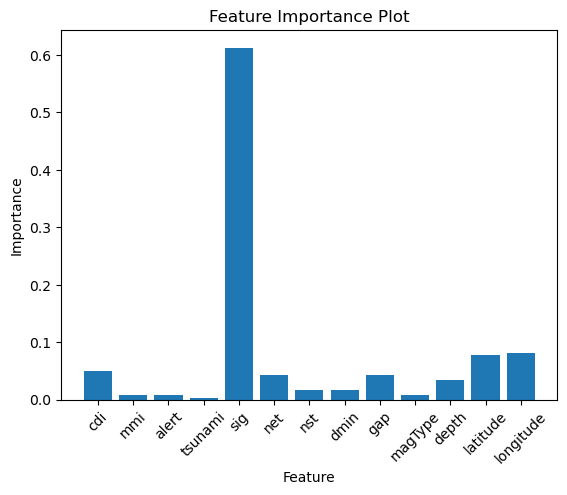

In [42]:
importances = rf.feature_importances_
features = ['cdi', 'mmi', 'alert', 'tsunami', 'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude', 'longitude']
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.xticks(rotation=45)
plt.show()

In [49]:
#From the above plot we can see that sig has highest important feature when it comes to find magnitude

# Concluding the Accurate Model

In [43]:
scores_df = pd.DataFrame(scores)
display(scores_df)

,Model name,mse,R^2
0,Linear regression,0.115005,0.166985
1,SVM,0.153913,-0.114837
2,Random Forest,0.036934,0.732479


In [44]:
scores_df[scores_df["mse"] == scores_df["mse"].min()]

,Model name,mse,R^2
2,Random Forest,0.036934,0.732479


In [45]:
scores_df[scores_df["R^2"] == scores_df["R^2"].max()]

,Model name,mse,R^2
2,Random Forest,0.036934,0.732479


# Conclusion

##### From the above result we can conclude that random forest is the most accurate model for predicting the magnitude of Earthquake compared to all other models used in this project